In [32]:
import math
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [33]:
pd.options.display.max_rows = 16

In [34]:
nobels = pd.read_csv('../chapter6/nobels.csv', names=['year','discipline','nobelist'])

In [35]:
nobels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        950 non-null    int64 
 1   discipline  950 non-null    object
 2   nobelist    950 non-null    object
dtypes: int64(1), object(2)
memory usage: 22.4+ KB


In [36]:
nobels.count()

year          950
discipline    950
nobelist      950
dtype: int64

In [37]:
nobels.head()

,year,discipline,nobelist
0,1901,Chemistry,Jacobus Henricus van 't Hoff
1,1901,Literature,Sully Prudhomme
2,1901,Medicine,Emil Adolf von Behring
3,1901,Peace,Frédéric Passy
4,1901,Peace,Henry Dunant


In [38]:
nobels.tail()

,year,discipline,nobelist
945,2019,Medicine,William Kaelin Jr.
946,2019,Peace,Abiy Ahmed
947,2019,Physics,Didier Queloz
948,2019,Physics,James Peebles
949,2019,Physics,Michel Mayor


In [39]:
len(nobels)

950

In [40]:
nobels.columns

Index(['year', 'discipline', 'nobelist'], dtype='object')

In [41]:
nobels.dtypes

year           int64
discipline    object
nobelist      object
dtype: object

In [42]:
nobels.index

RangeIndex(start=0, stop=950, step=1)

In [45]:
nobels['year'].values[:50]

array([1901, 1901, 1901, 1901, 1901, 1901, 1902, 1902, 1902, 1902, 1902,
       1902, 1902, 1903, 1903, 1903, 1903, 1903, 1903, 1903, 1904, 1904,
       1904, 1904, 1904, 1904, 1905, 1905, 1905, 1905, 1905, 1906, 1906,
       1906, 1906, 1906, 1906, 1907, 1907, 1907, 1907, 1907, 1907, 1908,
       1908, 1908, 1908, 1908, 1908, 1908])

In [47]:
nobels['discipline'].unique()

array(['Chemistry', 'Literature', 'Medicine', 'Peace', 'Physics',
       'Economics'], dtype=object)

In [48]:
nobels['discipline'].value_counts()

Medicine      219
Physics       213
Chemistry     184
Peace         134
Literature    116
Economics      84
Name: discipline, dtype: int64

In [49]:
nobels['year'].value_counts()

2001    15
2019    14
2018    13
2014    13
2013    13
        ..
1915     4
1924     3
1914     3
1918     2
1916     1
Name: year, Length: 116, dtype: int64

In [50]:
nobels['nobelist'].value_counts()

International Committee of the Red Cross         3
Frederick Sanger                                 2
John Bardeen                                     2
Marie Curie                                      2
United Nations High Commissioner for Refugees    2
                                                ..
John Hicks                                       1
Christopher A. Pissarides                        1
Sinclair Lewis                                   1
Fritz Haber                                      1
James M. Buchanan                                1
Name: nobelist, Length: 943, dtype: int64

In [51]:
nobels[nobels.discipline == 'Physics']

,year,discipline,nobelist
5,1901,Physics,Wilhelm Röntgen
11,1902,Physics,Hendrik Lorentz
12,1902,Physics,Pieter Zeeman
17,1903,Physics,Henri Becquerel
18,1903,Physics,Marie Curie
...,...,...,...
934,2018,Physics,Donna Strickland
935,2018,Physics,Gérard Mourou
947,2019,Physics,Didier Queloz
948,2019,Physics,James Peebles


In [52]:
nobels[nobels['discipline'] == 'Physics']

,year,discipline,nobelist
5,1901,Physics,Wilhelm Röntgen
11,1902,Physics,Hendrik Lorentz
12,1902,Physics,Pieter Zeeman
17,1903,Physics,Henri Becquerel
18,1903,Physics,Marie Curie
...,...,...,...
934,2018,Physics,Donna Strickland
935,2018,Physics,Gérard Mourou
947,2019,Physics,Didier Queloz
948,2019,Physics,James Peebles


In [54]:
nobels[nobels.nobelist == 'Curie']

,year,discipline,nobelist


In [55]:
nobels[nobels.nobelist.str.contains('Curie')]

,year,discipline,nobelist
18,1903,Physics,Marie Curie
19,1903,Physics,Pierre Curie
62,1911,Chemistry,Marie Curie
178,1935,Chemistry,Frédéric Joliot-Curie
179,1935,Chemistry,Irène Joliot-Curie


In [56]:
nobels[nobels['nobelist'].str.contains('Curie')]

,year,discipline,nobelist
18,1903,Physics,Marie Curie
19,1903,Physics,Pierre Curie
62,1911,Chemistry,Marie Curie
178,1935,Chemistry,Frédéric Joliot-Curie
179,1935,Chemistry,Irène Joliot-Curie


In [57]:
disco = pd.DataFrame(np.load('../chapter6/discography.npy'))

In [59]:
disco.head()

,title,release,toprank
0,David Bowie,1969-11-14,17
1,The Man Who Sold the World,1970-11-04,3
2,Hunky Dory,1971-12-17,5
3,Ziggy Stardust,1972-06-16,1
4,Aladdin Sane,1973-04-13,1


In [60]:
disco

,title,release,toprank
0,David Bowie,1969-11-14,17
1,The Man Who Sold the World,1970-11-04,3
2,Hunky Dory,1971-12-17,5
3,Ziggy Stardust,1972-06-16,1
4,Aladdin Sane,1973-04-13,1
5,Pin Ups,1973-10-19,1
6,Diamond Dogs,1974-05-24,1
7,Young Americans,1975-03-07,2
8,Station To Station,1976-01-23,5
9,Low,1977-01-14,2


In [61]:
disco

,title,release,toprank
0,David Bowie,1969-11-14,17
1,The Man Who Sold the World,1970-11-04,3
2,Hunky Dory,1971-12-17,5
3,Ziggy Stardust,1972-06-16,1
4,Aladdin Sane,1973-04-13,1
5,Pin Ups,1973-10-19,1
6,Diamond Dogs,1974-05-24,1
7,Young Americans,1975-03-07,2
8,Station To Station,1976-01-23,5
9,Low,1977-01-14,2


In [62]:
disco.set_index('toprank')

,title,release
toprank,,
17,David Bowie,1969-11-14
3,The Man Who Sold the World,1970-11-04
5,Hunky Dory,1971-12-17
1,Ziggy Stardust,1972-06-16
1,Aladdin Sane,1973-04-13
1,Pin Ups,1973-10-19
1,Diamond Dogs,1974-05-24
2,Young Americans,1975-03-07
5,Station To Station,1976-01-23


In [64]:
nobels.loc[[1,2,3]]

,year,discipline,nobelist
1,1901,Literature,Sully Prudhomme
2,1901,Medicine,Emil Adolf von Behring
3,1901,Peace,Frédéric Passy


In [70]:
nobels.loc[1:5]

,year,discipline,nobelist
1,1901,Literature,Sully Prudhomme
2,1901,Medicine,Emil Adolf von Behring
3,1901,Peace,Frédéric Passy
4,1901,Peace,Henry Dunant
5,1901,Physics,Wilhelm Röntgen


In [71]:
nobels_by_year = nobels.set_index('year')

In [78]:
nobels_by_year.loc[1911:1912]

,discipline,nobelist
year,,
1911,Chemistry,Marie Curie
1911,Literature,Maurice Maeterlinck
1911,Medicine,Allvar Gullstrand
1911,Peace,Alfred Hermann Fried
1911,Peace,Tobias Asser
1911,Physics,Wilhelm Wien
1912,Chemistry,Paul Sabatier
1912,Chemistry,Victor Grignard
1912,Literature,Gerhart Hauptmann


In [81]:
nobels_by_discipline = nobels.set_index('discipline').sort_index()

In [84]:
nobels_by_discipline

,year,nobelist
discipline,,
Chemistry,1901,Jacobus Henricus van 't Hoff
Chemistry,1988,Robert Huber
Chemistry,1932,Irving Langmuir
Chemistry,1988,Johann Deisenhofer
Chemistry,1988,Hartmut Michel
...,...,...
Physics,1999,Gerard 't Hooft
Physics,1922,Niels Bohr
Physics,1998,Robert B. Laughlin


In [82]:
nobels_by_discipline.loc['Physics']

,year,nobelist
discipline,,
Physics,1951,Ernest Walton
Physics,2018,Arthur Ashkin
Physics,1957,Chen Ning Yang
Physics,1906,J. J. Thomson
Physics,1953,Frits Zernike
...,...,...
Physics,1999,Gerard 't Hooft
Physics,1922,Niels Bohr
Physics,1998,Robert B. Laughlin


In [83]:
nobels_by_discipline.loc['Medicine':'Peace']

,year,nobelist
discipline,,
Medicine,1995,Christiane Nüsslein-Volhard
Medicine,1993,Phillip Allen Sharp
Medicine,1927,Julius Wagner-Jauregg
Medicine,1994,Alfred G. Gilman
Medicine,1993,Richard J. Roberts
...,...,...
Peace,1973,Henry Kissinger
Peace,1995,Pugwash Conferences on Science and World Affairs
Peace,1911,Alfred Hermann Fried


In [85]:
nobels_by_discipline.loc[:]

,year,nobelist
discipline,,
Chemistry,1901,Jacobus Henricus van 't Hoff
Chemistry,1988,Robert Huber
Chemistry,1932,Irving Langmuir
Chemistry,1988,Johann Deisenhofer
Chemistry,1988,Hartmut Michel
...,...,...
Physics,1999,Gerard 't Hooft
Physics,1922,Niels Bohr
Physics,1998,Robert B. Laughlin


In [86]:
nobels_by_discipline.iloc[1:5]

,year,nobelist
discipline,,
Chemistry,1988,Robert Huber
Chemistry,1932,Irving Langmuir
Chemistry,1988,Johann Deisenhofer
Chemistry,1988,Hartmut Michel


In [89]:
nobels_by_discipline.sort_index(ascending=False, inplace=True)

In [90]:
nobels_by_discipline.iloc[1:5]

,year,nobelist
discipline,,
Physics,1989,Hans Georg Dehmelt
Physics,1975,James Rainwater
Physics,1930,C. V. Raman
Physics,1939,Ernest Lawrence


In [91]:
nobels_multi = nobels.set_index(['year','discipline'])

In [92]:
nobels_multi

nobelist
year discipline                              
1901 Chemistry   Jacobus Henricus van 't Hoff
     Literature               Sully Prudhomme
     Medicine          Emil Adolf von Behring
     Peace                     Frédéric Passy
     Peace                       Henry Dunant
...                                       ...
2019 Medicine              William Kaelin Jr.
     Peace                         Abiy Ahmed
     Physics                    Didier Queloz
     Physics                    James Peebles
     Physics                     Michel Mayor

[950 rows x 1 columns]

In [99]:
nobels_multi.index, nobels_multi.index.nlevels, nobels_multi.index.get_level_values(2)

IndexError: Too many levels: Index has only 2 levels, not 3

In [98]:
nobels_multi.index.get_level_values(1).unique()

Index(['Chemistry', 'Literature', 'Medicine', 'Peace', 'Physics', 'Economics'], dtype='object', name='discipline')

In [110]:
nobels[(nobels.year >= 1901) & (nobels.year <= 1910) & (nobels.discipline != 'Chemistry') | (nobels.discipline == 'Physics')]

,year,discipline,nobelist
1,1901,Literature,Sully Prudhomme
2,1901,Medicine,Emil Adolf von Behring
3,1901,Peace,Frédéric Passy
4,1901,Peace,Henry Dunant
5,1901,Physics,Wilhelm Röntgen
...,...,...,...
934,2018,Physics,Donna Strickland
935,2018,Physics,Gérard Mourou
947,2019,Physics,Didier Queloz
948,2019,Physics,James Peebles


In [112]:
gapminder = pd.read_csv('../chapter6/gapminder.csv')
gapminder.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0


In [113]:
gapminder['log_gdp_per_day'] = np.log10(gapminder['gdp_per_capita'] / 365.25)

In [114]:
gapminder.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,log_gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,0.217727
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,0.218447
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0,0.218447
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0,0.233290
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0,0.248314


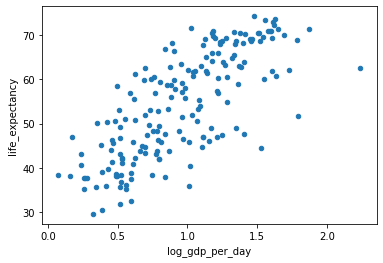

In [115]:
gapminder[gapminder['year'] == 1960].plot.scatter('log_gdp_per_day', 'life_expectancy')

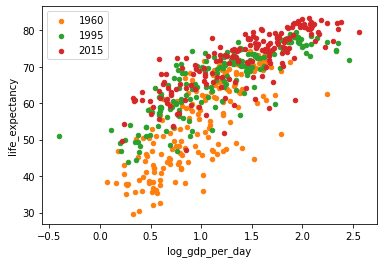

In [120]:
axes1 = gapminder[gapminder['year'] == 1960].plot.scatter('log_gdp_per_day', 'life_expectancy', label=1960,color="C1")
axes2 = gapminder[gapminder['year'] == 1995].plot.scatter('log_gdp_per_day', 'life_expectancy', label=1995, color="C2", ax=axes1)

gapminder[gapminder['year'] == 2015].plot.scatter('log_gdp_per_day', 'life_expectancy', label=2015, color="C3", ax=axes2)

Text(0, 0.5, 'life expectancy')

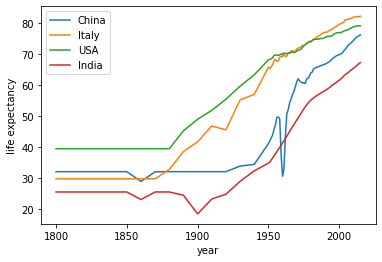

In [135]:
axes = gapminder[gapminder['country'] == 'China'].sort_values('year').plot('year', 'life_expectancy', label='China')
gapminder[gapminder['country'] == 'Italy'].sort_values('year').plot('year', 'life_expectancy', label='Italy', ax=axes)
gapminder[gapminder['country'] == 'United States'].sort_values('year').plot('year', 'life_expectancy', label='USA', ax=axes)
gapminder[gapminder['country'] == 'India'].sort_values('year').plot('year', 'life_expectancy', label='India', ax=axes)

pp.ylabel('life expectancy')

In [136]:
gapminder.babies_per_woman.mean()

4.643471506105837

In [137]:
gapminder.groupby('year').babies_per_woman.mean()

year
1800    6.105028
1810    6.094254
1820    6.094396
1830    6.085879
1840    6.072802
          ...   
2011    2.925110
2012    2.892912
2013    2.863407
2014    2.830934
2015    2.799231
Name: babies_per_woman, Length: 81, dtype: float64

In [150]:
gapminder.groupby('country')['babies_per_woman'].mean()

country
Afghanistan            7.284691
Albania                3.974321
Algeria                5.817778
Angola                 6.985062
Antigua and Barbuda    3.261235
                         ...   
Venezuela              4.597160
Vietnam                4.346049
Yemen                  7.142222
Zambia                 6.668519
Zimbabwe               6.003086
Name: babies_per_woman, Length: 182, dtype: float64

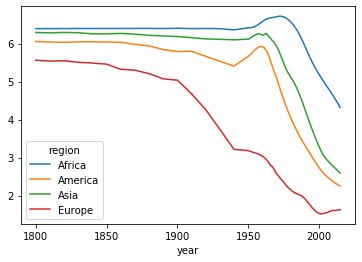

In [152]:
gapminder.pivot_table('babies_per_woman', 'year', 'region').plot()

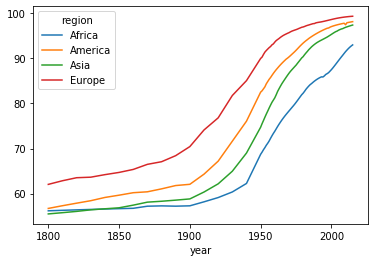

In [153]:
gapminder.pivot_table('age5_surviving', 'year', 'region').plot()